# Hope Village Distance Matrix Report
### Hope Village

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1CRDVRt5MIW2yBJxQ7QN3kHzzNqHlDQgs)

## Abstract
The data being analyzed in this notebook consists of similarity scores submitted by each individual member of each group in the MSU CMSE 495 capstone course. The scores correspond to how similar the projects of other groups are to one's own, with 1 being the most similar and 9 being the least similar. This data will tell us which groups could potentially help each other and provide support due to similar themes and objectives within the projects.

## Data input
In this section include code that reads in the csv file

In [1]:
import pandas as pd
import numpy as np
# csv file url from google drive
# url = 'https://drive.google.com/file/d/1qB2ZNQEMEN09qO6Si5sO9xzqeRV42Q9y/view?usp=sharing'
# url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
# df = pd.read_csv(url)

# csv file url from github
# url = 'https://raw.githubusercontent.com/colbrydi/CMSE495_2022_Distance_Measures/main/2022_Project_distance_Matrix.csv'
# df = pd.read_csv(url)

# directly from csv file
df = pd.read_csv('2022_Project_distance_Matrix.csv')

## Data Cleaning
In this section provide code for converting the raw data into clean and usable data structures (dictionary).

In [2]:
groups = list(df.columns.values)
group_dic = {} # set up a dictionary to store total distance from the data
group_mebers = {} # a dictionary to store number of members for each group
for i in range(len(df)):
    for g in groups:
        if df[g][i] == 0:
            if g in group_dic.keys():
                group_dic[g] = group_dic[g]+df.iloc[i]
                group_mebers[g] += 1
            else:
                group_dic[g] = df.iloc[i]
                group_mebers[g] = 1

In [8]:
group_dic

{'Hope Village': ARFL            31
 Argonne         27
 Boeing          36
 Delta Dental    32
 Ford            36
 Hope Village     0
 Kellogg's       23
 Neogen          22
 Old Nation      10
 Qside            8
 dtype: int64,
 'ARFL': ARFL             0
 Argonne         15
 Boeing          15
 Delta Dental    26
 Ford            20
 Hope Village    31
 Kellogg's       33
 Neogen          20
 Old Nation      28
 Qside           37
 dtype: int64,
 'Ford': ARFL            15
 Argonne         15
 Boeing          17
 Delta Dental    34
 Ford             0
 Hope Village    46
 Kellogg's       37
 Neogen          23
 Old Nation      41
 Qside           42
 dtype: int64,
 "Kellogg's": ARFL            13
 Argonne         17
 Boeing          13
 Delta Dental    25
 Ford            21
 Hope Village    16
 Kellogg's        0
 Neogen          14
 Old Nation      12
 Qside            4
 dtype: int64,
 'Boeing': ARFL            16
 Argonne         13
 Boeing           0
 Delta Dental    31
 Ford

## Data Modeling

This section that builds a model.  This doesn't have to be all that advanced. You should probably start with some simple statistical models such as an average distance matrix.

In [3]:
print('Based on the csv file, we can find out the number of members in each group.')
group_mebers

Based on the csv file, we can find out the number of members in each group.


{'Hope Village': 5,
 'ARFL': 5,
 'Ford': 6,
 "Kellogg's": 3,
 'Boeing': 5,
 'Delta Dental': 3,
 'Qside': 2,
 'Old Nation': 4,
 'Neogen': 3,
 'Argonne': 3}

In [4]:
group_name = list(df.columns)
matrix = pd.DataFrame(np.array([round(group_dic[i]/group_mebers[i],2) for i in group_name])) 
# use the total distance and number of members to get average
matrix.columns = group_name
matrix.index = group_name
matrix

,ARFL,Argonne,Boeing,Delta Dental,Ford,Hope Village,Kellogg's,Neogen,Old Nation,Qside
ARFL,0.00,3.00,3.00,5.20,4.00,6.20,6.60,4.00,5.60,7.40
Argonne,2.67,0.00,1.67,3.33,6.67,5.33,8.00,6.00,5.00,6.33
Boeing,3.20,2.60,0.00,6.20,4.60,8.00,5.60,2.60,5.80,6.40
Delta Dental,1.67,7.33,6.00,0.00,6.67,5.33,7.33,4.00,3.00,3.67
Ford,2.50,2.50,2.83,5.67,0.00,7.67,6.17,3.83,6.83,7.00
Hope Village,6.20,5.40,7.20,6.40,7.20,0.00,4.60,4.40,2.00,1.60
Kellogg's,4.33,5.67,4.33,8.33,7.00,5.33,0.00,4.67,4.00,1.33
Neogen,3.67,4.00,3.33,7.00,5.67,5.33,7.33,0.00,3.67,5.00
Old Nation,6.00,5.25,7.50,6.25,6.25,1.25,7.50,3.25,0.00,1.75
Qside,3.50,3.50,6.00,7.00,8.00,1.50,6.00,8.00,1.50,0.00


In [5]:
hope_village = group_dic['Hope Village']/group_mebers['Hope Village']
hope_village = hope_village.drop(['Hope Village'])

## Data Visualization

This section make some graphs visualizing your results.  A distance matrix and/or network graph may be cool.  Think though the best way to show what you learned.

Text(0.5, 1.0, 'Heatmap for CMSE495 Project Groups Average Distance Matrix')

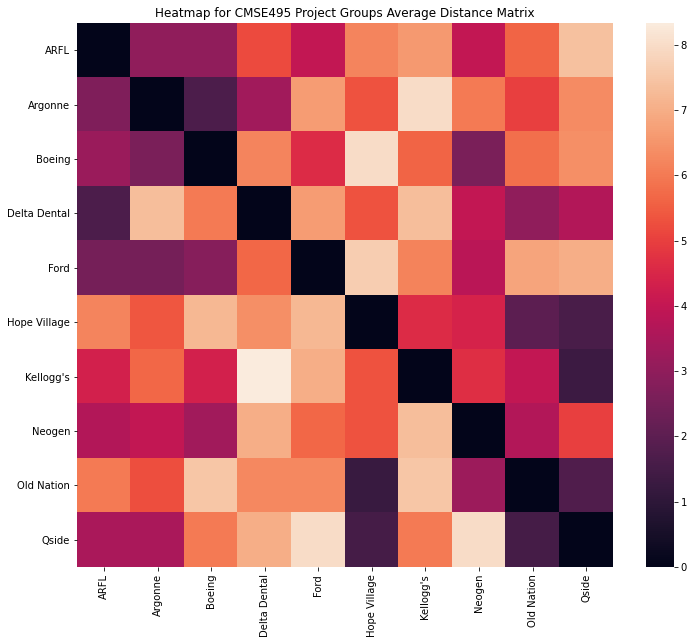

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(matrix)
plt.title('Heatmap for CMSE495 Project Groups Average Distance Matrix')

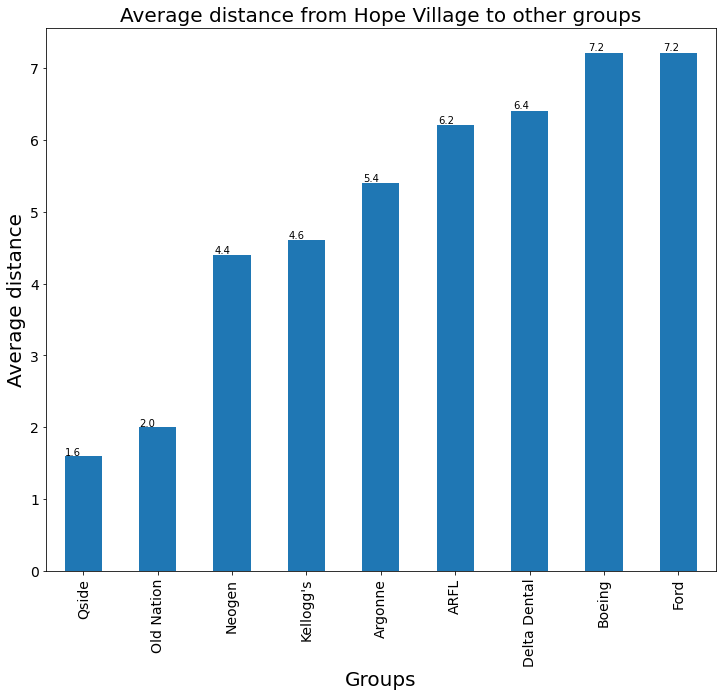

In [7]:
hope_village = hope_village.sort_values()
ax = hope_village.plot(kind='bar', figsize = (12,10))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
title_size = 14
axes_size = 12
label_size = 10
plt.title('Average distance from Hope Village to other groups')
plt.xlabel('Groups')
plt.ylabel('Average distance')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(20)
for label in (ax.get_xticklabels()+ax.get_yticklabels()):
    label.set_fontsize(14)

## Conclusion

After analyzing the data we can conclude that QSIDE and Old Nation have the most similar projects to our group (Hope Village) with average similarity scores of 1.6 and 2.0 respectively before a large drop off to a score of 4.4 with Neogen. We can also determine that the projects least similar to Hope Village would be Boeing and Ford, both possessing an average score of 7.2. An observation that can be made from these conclusions is that all three of these projects are very open-ended in regards to what analysis should be performed and with what data sources. In other words, these three projects are the most ambiguous in regards to what questions should be asked and pursued. Additionally, these three projects have a “human” element to them in that one or many of their related data sources would involve demographical data. Furthermore, the questions handed to these teams are all concerned with a specific region. Conversely, projects like Boeing and Ford set out to answer questions related to physical, inanimate objects. Questions like these are better-defined, but require rigorous analysis involving ML models and the like. For QSIDE, Old Nation, and Hope Village, their projects require less technical analysis where the rigor of the project is front-loaded on finding and cleaning data sources to support open-ended questions.